In [24]:
import pandas as pd

# Load your CSV file
file_path = "my_data.csv"  # Replace with your actual file path
data = pd.read_csv(file_path)

# Display the columns
display(data.columns.tolist())


['Date',
 'Activity Type',
 'Website/Platform',
 'Time Start',
 'Time End',
 'Title/Item',
 'Media Genre/Item Type',
 'Recommendation Clicked',
 'Browsing?',
 'Specific Search?']

In [25]:
# Load the cleaned data
file_path = "my_data.csv"  # Update with the correct path if needed
data = pd.read_csv(file_path)

# Optional: Strip whitespace from column names
data.columns = data.columns.str.strip()

# Display the columns in the dataset
print("Column Names:", data.columns.tolist())

Column Names: ['Date', 'Activity Type', 'Website/Platform', 'Time Start', 'Time End', 'Title/Item', 'Media Genre/Item Type', 'Recommendation Clicked', 'Browsing?', 'Specific Search?']


In [26]:
import pandas as pd

# Load the cleaned data
file_path = "my_data.csv"  # Update with the correct path if needed
data = pd.read_csv(file_path)

# Strip whitespace from column names
data.columns = data.columns.str.strip()

# Display the first few rows and column names
print(data.head())
print("Column Names:", data.columns.tolist())  # Check the actual column names

# Check for 'Time Start' and 'Time End' columns and calculate 'Duration (minutes)'
if 'Time Start' in data.columns and 'Time End' in data.columns:
    # Convert 'Time Start' and 'Time End' to datetime
    data['Time Start'] = pd.to_datetime(data['Time Start'], errors='coerce')
    data['Time End'] = pd.to_datetime(data['Time End'], errors='coerce')
    
    # Calculate duration in minutes
    data['Duration (minutes)'] = (data['Time End'] - data['Time Start']).dt.total_seconds() / 60
else:
    print("Time Start or Time End columns are missing.")

# Calculate Total Duration
total_duration = data['Duration (minutes)'].sum() if 'Duration (minutes)' in data.columns else 0

# Check if 'Student Initials' column exists
if 'Student Initials' in data.columns:
    # Calculate Unique Students
    unique_students = data['Student Initials'].nunique()
else:
    print("Column 'Student Initials' is missing.")
    unique_students = 0  # Set to 0 or handle accordingly

# Calculate Total Activities
total_activities = data.shape[0]

# Check for 'Recommendation Clicked' and calculate total
if 'Recommendation Clicked' in data.columns:
    data['Recommendation Clicked'] = pd.to_numeric(data['Recommendation Clicked'], errors='coerce')
    total_recommendations_clicked = data['Recommendation Clicked'].sum()
else:
    print("Column 'Recommendation Clicked' is missing.")
    total_recommendations_clicked = 0

# 1. Average Time Spent on Activities per Student
average_time_per_student = total_duration / unique_students if unique_students > 0 else 0
print(f'Average Time per Student: {average_time_per_student:.2f} minutes')

# 2. Activity Frequency per Student
frequency_per_student = total_activities / unique_students if unique_students > 0 else 0
print(f'Activity Frequency per Student: {frequency_per_student:.2f} activities')

# 3. Recommendations Clicked Rate
recommendations_clicked_rate = total_recommendations_clicked / total_duration if total_duration > 0 else 0
print(f'Recommendations Clicked Rate: {recommendations_clicked_rate:.4f} recommendations per minute')

# Optional: Print summary statistics for duration
if 'Duration (minutes)' in data.columns:
    print("Duration Summary Statistics:")
    print(data['Duration (minutes)'].describe())

         Date       Activity Type Website/Platform Time Start  Time End  \
0  11/16/2024     Online Shopping           Amazon    9:00 AM   9:30 AM   
1  11/16/2024  Movie/TV Streaming          Netflix    8:00 PM  10:00 PM   
2  11/17/2024     Online Shopping             Etsy   11:00 AM  11:20 AM   
3  11/17/2024  Movie/TV Streaming          YouTube    7:30 PM   9:00 PM   
4  11/18/2024  Movie/TV Streaming      Disney Plus    6:30 PM   9:00 PM   

                Title/Item Media Genre/Item Type  Recommendation Clicked  \
0          Gardening tools             Homegoods                       3   
1                The Crown                 Drama                       0   
2  Handmade candle holders             Homegoods                       2   
3      Gardening tutorials           Educational                       1   
4                 Hamilton               Musical                       0   

  Browsing? Specific Search?  
0       Yes               No  
1        No              Yes  

C:\Users\MLuca\AppData\Local\Temp\ipykernel_24684\3474693618.py:17: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Time Start'] = pd.to_datetime(data['Time Start'], errors='coerce')
C:\Users\MLuca\AppData\Local\Temp\ipykernel_24684\3474693618.py:18: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Time End'] = pd.to_datetime(data['Time End'], errors='coerce')


C:\Users\MLuca\AppData\Local\Temp\ipykernel_24684\1860826646.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Time Start'] = pd.to_datetime(data['Time Start'])
C:\Users\MLuca\AppData\Local\Temp\ipykernel_24684\1860826646.py:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Time End'] = pd.to_datetime(data['Time End'])


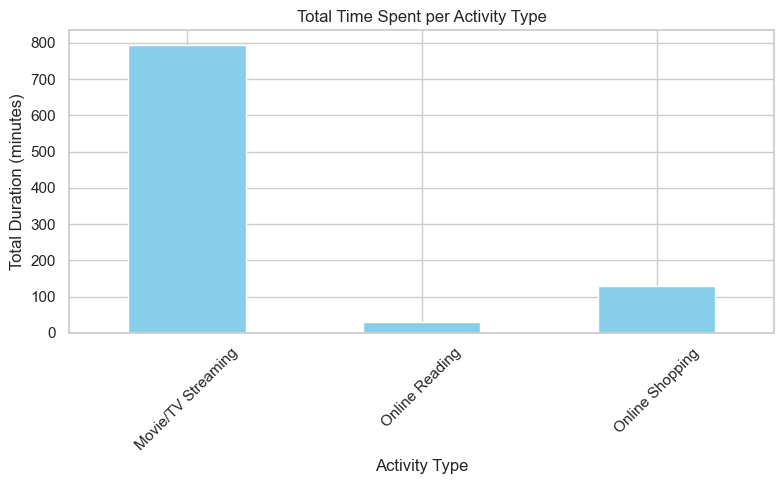

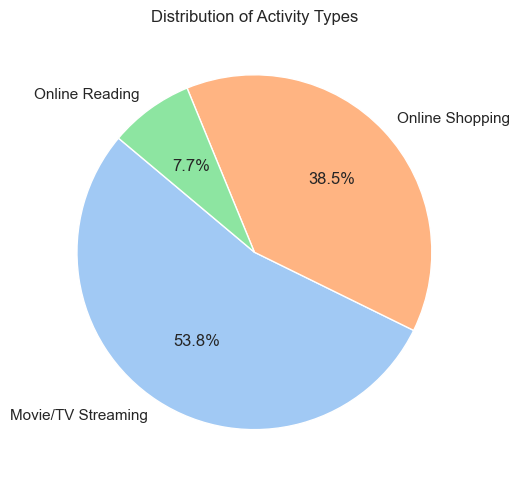

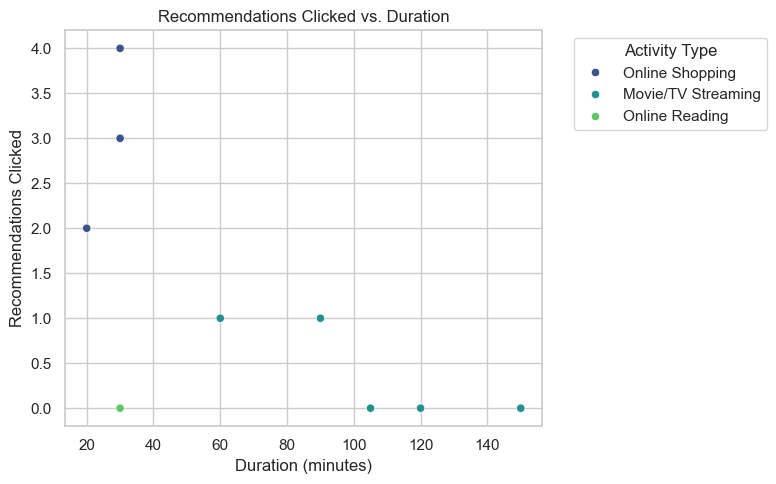

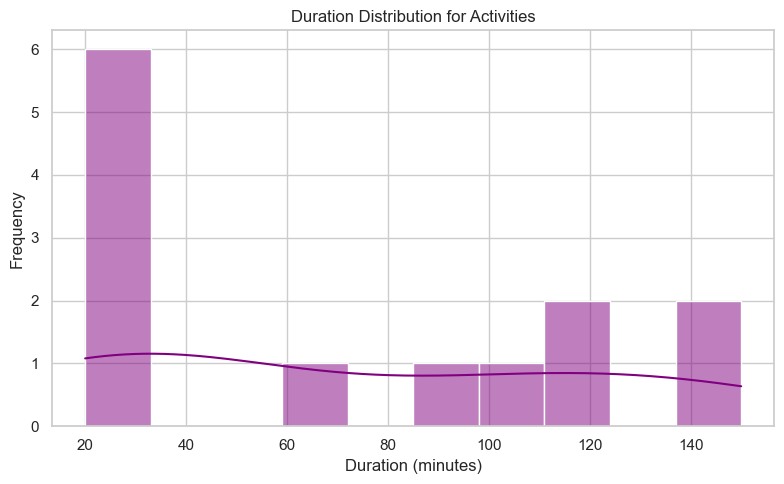

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned data
file_path = "my_data.csv"  # Update with the correct path if needed
data = pd.read_csv(file_path)

# Convert 'Time Start' and 'Time End' to datetime
data['Time Start'] = pd.to_datetime(data['Time Start'])
data['Time End'] = pd.to_datetime(data['Time End'])

# Calculate Duration in minutes
data['Duration (minutes)'] = (data['Time End'] - data['Time Start']).dt.total_seconds() / 60

# Setting up the plot style
sns.set(style="whitegrid")

# Bar Chart: Total time spent per activity type
activity_time = data.groupby('Activity Type')['Duration (minutes)'].sum()
plt.figure(figsize=(8, 5))
activity_time.plot(kind='bar', color='skyblue')
plt.title('Total Time Spent per Activity Type')
plt.ylabel('Total Duration (minutes)')
plt.xlabel('Activity Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Pie Chart: Distribution of activity types
activity_counts = data['Activity Type'].value_counts()
plt.figure(figsize=(8, 5))
activity_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title('Distribution of Activity Types')
plt.ylabel('')  # Hide y-axis label for pie chart
plt.tight_layout()
plt.show()

# Scatter Plot: Recommendations clicked vs. duration
plt.figure(figsize=(8, 5))
sns.scatterplot(data=data, x='Duration (minutes)', y='Recommendation Clicked', hue='Activity Type', palette='viridis')
plt.title('Recommendations Clicked vs. Duration')
plt.xlabel('Duration (minutes)')
plt.ylabel('Recommendations Clicked')
plt.legend(title='Activity Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Histogram: Duration distribution for activities
plt.figure(figsize=(8, 5))
sns.histplot(data['Duration (minutes)'], bins=10, kde=True, color='purple')
plt.title('Duration Distribution for Activities')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()
